<a href="https://colab.research.google.com/github/rodmart21/CV/blob/main/CV_KNN_Mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training and deployment of KNN Image Classification Model.

## 1) Data preparation and visualization.

Install and load all required libraries.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imutils import paths
import seaborn as sns
import tensorflow as tf
import random
import time
from datetime import datetime
import cv2
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

Show some of the data from MNIST dataset. It has many images with the numbers (0-9) and their labels.

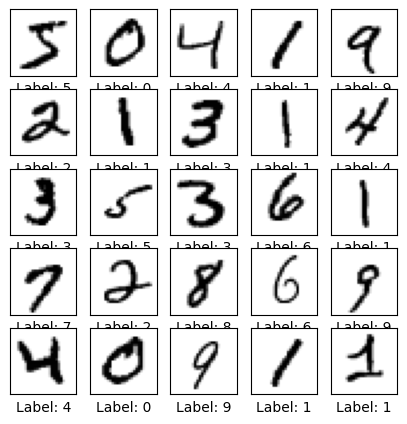

In [5]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(f'Label: {y_train[i]}')
plt.show()

Load and process all the images with their respective layers (KNN is a supervised ML algorithm).

A reduction in the data is made, so the training doesn't take so much time.

In [17]:
x_train_flattened = x_train.reshape((x_train.shape[0], -1)).astype(np.float32)
x_test_flattened = x_test.reshape((x_test.shape[0], -1)).astype(np.float32)
y_train_flattened = y_train.astype(np.float32)

## 2) Train and test the model.

Create an array of the <code>train_images</code> and <code>train_labels</code>. <code>OpenCV</code> only identifies arrays of type <code>float32</code> for the training samples and array of shape <code>(label size, 1)</code> for the training labels. We can do that by specifying <code>astype('float32')</code> on the numpy array of the training samples and convert the training labels to integers and <code>reshape</code> the array to <code>(label size, 1)</code>. When you print the <code>train_labels</code>, the array will look like this <code>[[1], [0], ..., [0]]</code></p>


To train the KNN model, we will use the <code>cv2.ml.KNearest_create()</code> from the <code>OpenCV</code> library. We need to define how many nearest neighbors will be used for classification as a hyper-parameter k. This parameter k can be toggled with/tuned in the training or model validation process. Fit the training and test images and get the accuracy score of the model.

We will try multiple values of <code>k</code> to find the optimal value for the dataset we have. <code>k</code> refers to the number of nearest neighbours to include in the majority of the voting process.

<i>Note:</i> Depending on how large your dataset is, it may take a few seconds to run.


Train with all available data, it takes a long time to finish the training.Ç

In [16]:
# The KNN model:
knn = cv2.ml.KNearest_create()
knn.train(x_train_flattened, cv2.ml.ROW_SAMPLE, y_train_flattened)
k_values = [1, 2, 3, 4, 5]
k_result = []

start_datetime = datetime.now()

for k in k_values:
    ret, result, neighbours, dist = knn.findNearest(x_test_flattened, k=k)
    k_result.append(result)

# Flatten the data:
flattened = []
for res in k_result:
    flat_result = [item for sublist in res for item in sublist]
    flattened.append(flat_result)

end_datetime = datetime.now()
print('Training Duration: ' + str(end_datetime - start_datetime))

Training Duration: 0:21:33.758311


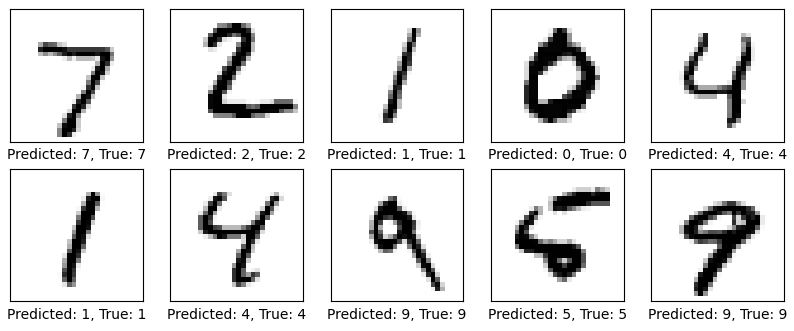

In [20]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(f'Predicted: {int(flattened[0][i])}, True: {y_test[i]}')
plt.show()

With this training with 60.000 values, the results in the testing dataset is very accurate. Let's check how is the performance in case of using a smaller training set.

# Using less data for the training of the model, the performance is still quite good.

Make the training with this few values. Before we did it with almost all values,

In [25]:
x_train_small = x_train[:2000]
y_train_small = y_train[:2000]
x_test_small = x_test[:200]
y_test_small= y_test[:200]

In [26]:
x_train_flattened_s = x_train_small.reshape((x_train_small.shape[0], -1)).astype(np.float32)
x_test_flattened_s = x_test_small.reshape((x_test_small.shape[0], -1)).astype(np.float32)
y_train_flattened_s = y_train_small.astype(np.float32)

In [27]:
# The KNN model:
knn = cv2.ml.KNearest_create()
knn.train(x_train_flattened_s, cv2.ml.ROW_SAMPLE, y_train_flattened_s)
k_values = [1, 2, 3, 4, 5]
k_result = []

start_datetime = datetime.now()

for k in k_values:
    ret, result, neighbours, dist = knn.findNearest(x_test_flattened_s, k=k)
    k_result.append(result)

# Flatten the data:
flattened = []
for res in k_result:
    flat_result = [item for sublist in res for item in sublist]
    flattened.append(flat_result)

end_datetime = datetime.now()
print('Training Duration: ' + str(end_datetime - start_datetime))

Training Duration: 0:00:01.019496


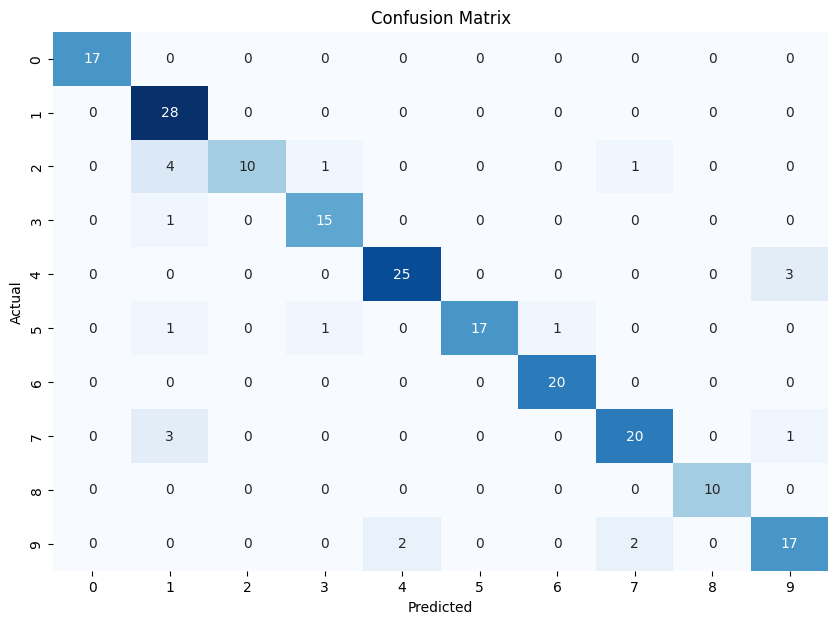

In [28]:
y_test_flattened_s = y_test_small.flatten()
k_best_result = [item for sublist in k_result[-1] for item in sublist]
y_pred = np.array(k_best_result)

cm = confusion_matrix(y_test_flattened_s, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [29]:
y_pred_s = np.array(k_best_result)
report = classification_report(y_test_flattened_s, y_pred_s)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.76      1.00      0.86        28
           2       1.00      0.62      0.77        16
           3       0.88      0.94      0.91        16
           4       0.93      0.89      0.91        28
           5       1.00      0.85      0.92        20
           6       0.95      1.00      0.98        20
           7       0.87      0.83      0.85        24
           8       1.00      1.00      1.00        10
           9       0.81      0.81      0.81        21

    accuracy                           0.90       200
   macro avg       0.92      0.89      0.90       200
weighted avg       0.91      0.90      0.89       200

